In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
df.dropna(how='any',inplace=True)

In [6]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [8]:
def report(classifier):
    y_pred = classifier.predict(x_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    display.plot()
    plt.title("Confusion Matrix")
    plt.show()
    # Print accuracy, precision, and recall
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
    # Plot Precision-Recall curve
    PrecisionRecallDisplay.from_estimator(classifier, x_test, y_test)
    plt.title("Precision-Recall Curve")
    plt.show()
    # Plot ROC curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title("ROC Curve")
    plt.show()

In [9]:
#Using KNN

In [10]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

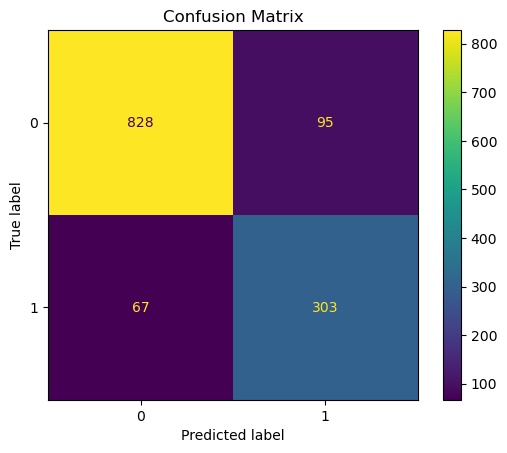

Accuracy: 0.8747099767981439
Precision Score: 0.8782577940448201
Recall Score: 0.8747099767981439


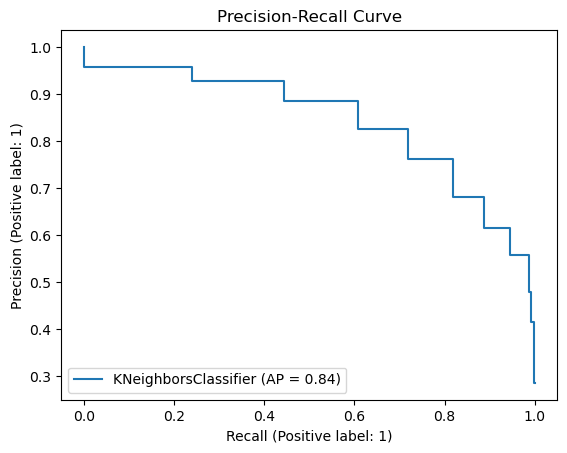

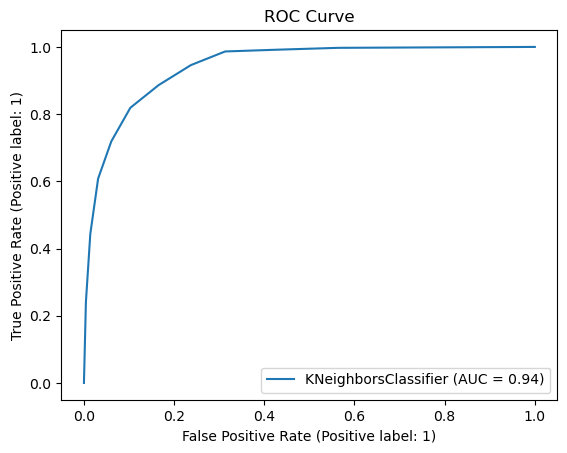

In [11]:
report(kNN)

In [12]:
#Using SVM

In [13]:
svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=10)

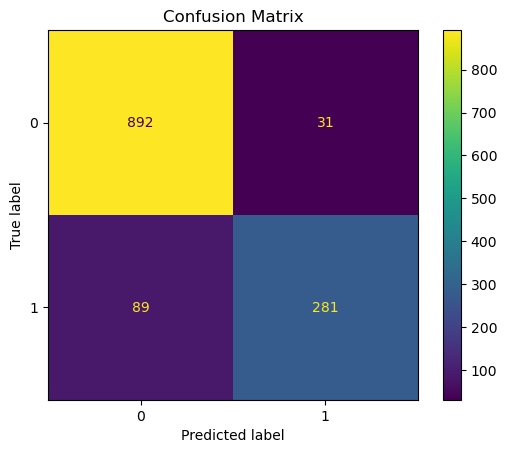

Accuracy: 0.9071925754060325
Precision Score: 0.9068052258786417
Recall Score: 0.9071925754060325


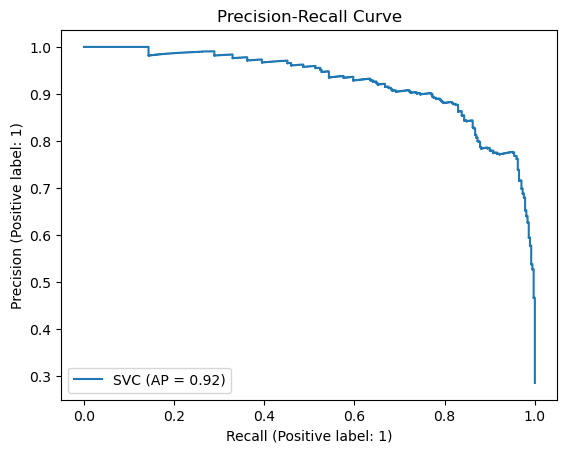

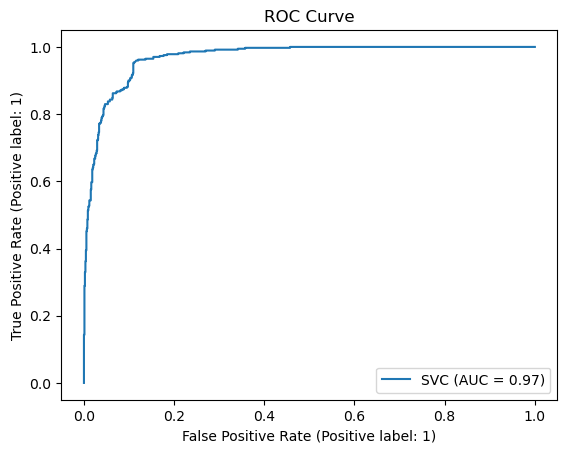

In [14]:
report(svm)